In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

raw_dispatch = pd.read_excel("Dispatch_260924-251024.xlsx")
raw_secondly = pd.read_excel("../Final_data_crusher_every_second/September.xlsx")

## Data dispatch

In [3]:
main_dispatch = raw_dispatch[["Destination", "Truck Discharge Date", "Real Tons", "Deep Work Index", "Bond Work Index", "TPH to Mills", "Sedimentation Rate", "Abrasiveness Index"]]
main_dispatch = main_dispatch[main_dispatch["Destination"] == "CS03"]
main_dispatch.drop(["Destination"], axis=1, inplace=True)
main_dispatch.rename(columns={"Deep Work Index": "Drop Work Index"}, inplace=True)
main_dispatch.set_index("Truck Discharge Date", inplace=True)
main_dispatch.index = pd.to_datetime(main_dispatch.index, format="%m-%d-%Y %I:%M:%S %p")
main_dispatch.head()

,Real Tons,Drop Work Index,Bond Work Index,TPH to Mills,Sedimentation Rate,Abrasiveness Index
Truck Discharge Date,,,,,,
2024-09-26 00:00:29,279.85,3.67,10.83,7047.38,57.53,0.02
2024-09-26 00:03:31,266.34,4.89,11.96,6916.08,124.15,0.29
2024-09-26 00:03:34,303.98,4.89,11.96,6916.08,124.15,0.29
2024-09-26 00:03:38,303.98,4.89,11.96,6916.08,124.15,0.29
2024-09-26 00:07:20,309.77,5.06,12.00,6921.83,34.18,0.24


In [4]:
dispatch_day: datetime = main_dispatch.index[0]
dispatch_day_data = main_dispatch.loc[lambda df: df.index.date == dispatch_day.date()]
dispatch_day_data

,Real Tons,Drop Work Index,Bond Work Index,TPH to Mills,Sedimentation Rate,Abrasiveness Index
Truck Discharge Date,,,,,,
2024-09-26 00:00:29,279.85,3.67,10.83,7047.38,57.53,0.02
2024-09-26 00:03:31,266.34,4.89,11.96,6916.08,124.15,0.29
2024-09-26 00:03:34,303.98,4.89,11.96,6916.08,124.15,0.29
2024-09-26 00:03:38,303.98,4.89,11.96,6916.08,124.15,0.29
2024-09-26 00:07:20,309.77,5.06,12.00,6921.83,34.18,0.24
...,...,...,...,...,...,...
2024-09-26 23:52:16,241.25,5.13,11.34,7297.88,54.41,0.31
2024-09-26 23:52:16,241.25,5.19,11.47,7165.84,56.37,0.31
2024-09-26 23:54:52,297.65,4.98,12.98,6845.00,29.64,0.11


In [5]:
main_dispatch.corr()

,Real Tons,Drop Work Index,Bond Work Index,TPH to Mills,Sedimentation Rate,Abrasiveness Index
Real Tons,1.000000,-0.023299,0.045624,-0.022953,0.022419,-0.050717
Drop Work Index,-0.023299,1.000000,0.731318,0.607572,-0.001951,0.230624
Bond Work Index,0.045624,0.731318,1.000000,0.522959,0.113809,0.025680
TPH to Mills,-0.022953,0.607572,0.522959,1.000000,0.354690,0.563202
Sedimentation Rate,0.022419,-0.001951,0.113809,0.354690,1.000000,0.318362
Abrasiveness Index,-0.050717,0.230624,0.025680,0.563202,0.318362,1.000000


## Data every second

In [6]:
columns = {"115FE204_02M1RUN": "Feeder motor 1",
           "115FE204_02M2RUN": "Feeder motor 2",
           "CO13_V0304S01": "Crusher RPM",
           "CO13_V0306P03": "Crusher pressure",
           "CO13_V0304E01": "Crusher power consumption",
           "115CR004Motor": "Crusher current",
           "115LIT12040A": "Bin level leveler",
           "115LIT12040E": "Bin level dome"}
main_secondly = raw_secondly.rename(columns=columns)
main_secondly = main_secondly.drop(0)
main_secondly.set_index("Timestamp", inplace=True)
translations = {"FUNCIONANDO": True, "DETENIDO": False}
main_secondly = main_secondly.replace({"Feeder motor 1": translations, "Feeder motor 2": translations}).infer_objects(copy=False)
main_secondly.head()

C:\Users\Quang Truong\AppData\Local\Temp\ipykernel_1348\3099179954.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  main_secondly = main_secondly.replace({"Feeder motor 1": translations, "Feeder motor 2": translations}).infer_objects(copy=False)


,Feeder motor 1,Feeder motor 2,Crusher RPM,Crusher pressure,Crusher power consumption,Crusher current,Bin level leveler,Bin level dome
Timestamp,,,,,,,,
2024-09-26 00:00:00,True,True,496.164764,13.492004,141.437561,84.729385,67.601555,0.0
2024-09-26 00:00:01,True,True,489.028107,13.092004,142.869415,84.729385,67.715233,0.0
2024-09-26 00:00:02,True,True,480.428101,12.693004,144.301254,84.729385,67.791870,0.0
2024-09-26 00:00:03,True,True,471.997009,12.343004,145.733093,84.729385,67.943069,0.0
2024-09-26 00:00:04,True,True,471.847015,12.015739,147.164932,84.729385,67.981049,0.0


In [7]:
secondly_day: datetime = main_secondly.index[0]
secondly_day_data = main_secondly.loc[lambda df: df.index.date == secondly_day.date()]
secondly_day_data

,Feeder motor 1,Feeder motor 2,Crusher RPM,Crusher pressure,Crusher power consumption,Crusher current,Bin level leveler,Bin level dome
Timestamp,,,,,,,,
2024-09-26 00:00:00,True,True,496.164764,13.492004,141.437561,84.729385,67.601555,0.0
2024-09-26 00:00:01,True,True,489.028107,13.092004,142.869415,84.729385,67.715233,0.0
2024-09-26 00:00:02,True,True,480.428101,12.693004,144.301254,84.729385,67.791870,0.0
2024-09-26 00:00:03,True,True,471.997009,12.343004,145.733093,84.729385,67.943069,0.0
2024-09-26 00:00:04,True,True,471.847015,12.015739,147.164932,84.729385,67.981049,0.0
...,...,...,...,...,...,...,...,...
2024-09-26 23:59:55,True,True,510.000000,14.740201,188.495239,85.045166,68.643219,0.0
2024-09-26 23:59:56,True,True,510.000000,14.640202,198.870239,85.430733,68.731209,0.0
2024-09-26 23:59:57,True,True,510.000000,14.450502,209.245239,85.816299,68.873055,0.0


### Discrepancy between two feeder motors

In [8]:
len(main_secondly[main_secondly["Feeder motor 1"] != main_secondly["Feeder motor 2"]])

60

### Discrepancy between two bin level sensors

<Axes: ylabel='Frequency'>

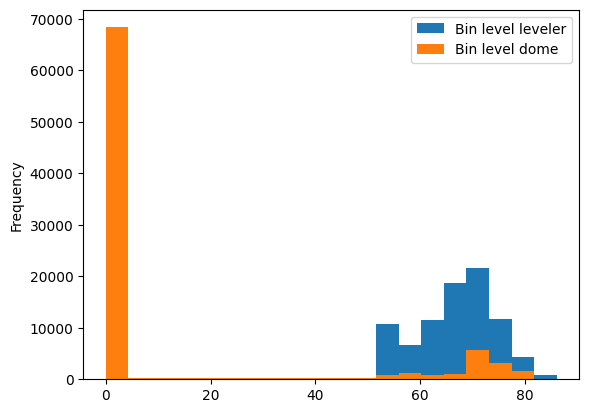

In [9]:
secondly_day_data.plot.hist(column=["Bin level leveler", "Bin level dome"], bins=20)

<Axes: xlabel='Timestamp'>

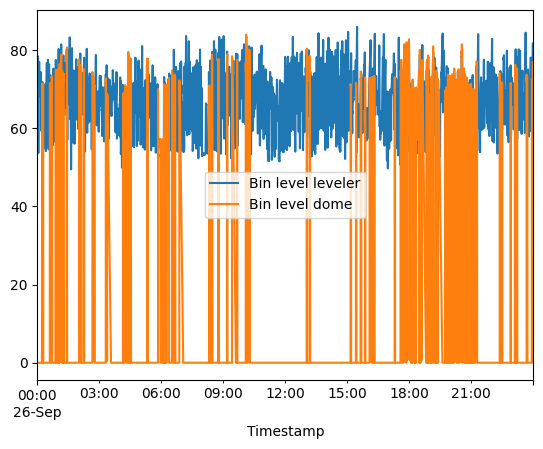

In [10]:
secondly_day_data[["Bin level leveler", "Bin level dome"]].plot()

## Marge dispatch + secondly day data

In [11]:
merged_df = dispatch_day_data.merge(secondly_day_data, how="right", left_index=True, right_index=True)
# merged_df.ffill(inplace=True)
merged_df.head()

,Real Tons,Drop Work Index,Bond Work Index,TPH to Mills,Sedimentation Rate,Abrasiveness Index,Feeder motor 1,Feeder motor 2,Crusher RPM,Crusher pressure,Crusher power consumption,Crusher current,Bin level leveler,Bin level dome
2024-09-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,True,True,496.164764,13.492004,141.437561,84.729385,67.601555,0.0
2024-09-26 00:00:01,NaN,NaN,NaN,NaN,NaN,NaN,True,True,489.028107,13.092004,142.869415,84.729385,67.715233,0.0
2024-09-26 00:00:02,NaN,NaN,NaN,NaN,NaN,NaN,True,True,480.428101,12.693004,144.301254,84.729385,67.791870,0.0
2024-09-26 00:00:03,NaN,NaN,NaN,NaN,NaN,NaN,True,True,471.997009,12.343004,145.733093,84.729385,67.943069,0.0
2024-09-26 00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,True,True,471.847015,12.015739,147.164932,84.729385,67.981049,0.0


### Select ranges where time gap between two discharges > 70s

Traffic light stays green only for one truck at a time

In [12]:
from datetime import timedelta

single_truck_cond = pd.Series(main_dispatch.index).diff() > timedelta(minutes=1, seconds=10)
single_truck_cond = single_truck_cond.shift(-1, fill_value=single_truck_cond.iat[-1])
single_truck_cond.index = main_dispatch.index
single_truck_range_index = main_dispatch[single_truck_cond].index
single_truck_range_index

DatetimeIndex(['2024-09-26 00:00:29', '2024-09-26 00:03:38',
               '2024-09-26 00:07:20', '2024-09-26 00:11:08',
               '2024-09-26 00:12:56', '2024-09-26 00:16:32',
               '2024-09-26 00:21:00', '2024-09-26 00:23:38',
               '2024-09-26 00:27:01', '2024-09-26 00:29:18',
               ...
               '2024-10-25 23:17:42', '2024-10-25 23:22:32',
               '2024-10-25 23:25:37', '2024-10-25 23:28:55',
               '2024-10-25 23:33:26', '2024-10-25 23:38:08',
               '2024-10-25 23:42:32', '2024-10-25 23:46:15',
               '2024-10-25 23:52:52', '2024-10-25 23:54:15'],
              dtype='datetime64[ns]', name='Truck Discharge Date', length=12154, freq=None)

In [13]:
raw_merged = pd.read_csv("../merged.csv")
raw_merged["time"] = pd.to_datetime(raw_merged["time"])
raw_merged.head()

,time,traffic_light,Real Tons,Bin Level,Bond Work Index,Deep Work Index,Sedimentation Rate,Abrasiveness Index,Copper Grade,Soluble Copper Grade,...,Piro,Cp,Bn,Ill,Mus,Sulfide,PH,Copper Recovery,feeder 1st Motor,feeder 2st Motor
0,2024-10-13 00:01:20,1,337.75,71.504211,12.92,4.75,32.45,0.16,0.87,0.04,...,1.15,0.6,0.25,12.08,15.54,1.44,6.9,90.13,1,1
1,2024-10-13 00:01:21,1,0.00,71.132164,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,1,1
2,2024-10-13 00:01:22,1,0.00,70.801025,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,1,1
3,2024-10-13 00:01:23,1,0.00,70.498894,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,1,1
4,2024-10-13 00:01:24,1,0.00,70.188782,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,1,1


In [46]:
single_truck_ranges: list[pd.DataFrame] = []
for new_truck_time in single_truck_range_index.intersection(raw_merged["time"]):
    try:
        start_index: int = raw_merged.index[raw_merged["time"] == new_truck_time][0]
        end_index: int = raw_merged[start_index + 1:].index[raw_merged[start_index + 1:]["Real Tons"] > 0][0]
        single_truck_ranges.append(raw_merged[start_index : end_index])
    except IndexError:
        continue

### How much time a truck load takes to reach the bin

For a discharge, add time of bin level increasing

In [100]:
merged_with_increasing = raw_merged.copy()
merged_with_increasing["increasing_time"] = pd.NaT
bin_increasing_ranges: list[pd.DataFrame] = []
# Check bin level 3 seconds ago
bin_increasing_cond = merged_with_increasing["Bin Level"] > merged_with_increasing["Bin Level"].shift(3)
for new_truck_time in single_truck_range_index.intersection(merged_with_increasing["time"]):
    try:
        start_index: int = merged_with_increasing.index[merged_with_increasing["time"] == new_truck_time][0]
        if bin_increasing_cond[start_index : start_index + 4].any():
            # Don't care if bin level is already increasing
            continue
        bin_increasing_index: int = merged_with_increasing[start_index + 1:].index[bin_increasing_cond[start_index + 1:]][0]
        merged_with_increasing.at[start_index, "increasing_time"] = merged_with_increasing.at[bin_increasing_index, "time"]
        bin_increasing_ranges.append(merged_with_increasing[start_index : bin_increasing_index + 4])
    except IndexError:
        continue

In [109]:
merged_only_discharge = merged_with_increasing.dropna()
merged_only_discharge = merged_only_discharge.drop("traffic_light", axis=1)
merged_only_discharge[["time", "increasing_time", "Real Tons", "Bin Level", "Bond Work Index", "feeder 1st Motor"]]

,time,increasing_time,Real Tons,Bin Level,Bond Work Index,feeder 1st Motor
0,2024-10-13 00:01:20,2024-10-13 00:02:29,337.75,71.504211,12.92,1
245,2024-10-13 00:05:25,2024-10-13 00:05:58,303.98,73.412682,14.42,1
593,2024-10-13 00:11:13,2024-10-13 00:11:48,303.98,66.399635,14.42,1
1436,2024-10-13 00:25:16,2024-10-13 00:25:45,282.74,73.657356,14.42,1
1797,2024-10-13 00:31:17,2024-10-13 00:32:15,241.25,73.748230,14.42,1
...,...,...,...,...,...,...
1033677,2024-10-24 23:09:17,2024-10-24 23:09:33,303.98,54.271206,11.35,1
1033905,2024-10-24 23:13:05,2024-10-24 23:14:01,297.22,56.814133,11.58,1
1034493,2024-10-24 23:22:53,2024-10-24 23:23:59,303.98,61.144444,12.00,1
1035987,2024-10-24 23:47:47,2024-10-24 23:47:51,299.15,55.505909,11.11,1


### Try time series analysis

https://builtin.com/data-science/time-series-forecasting-python

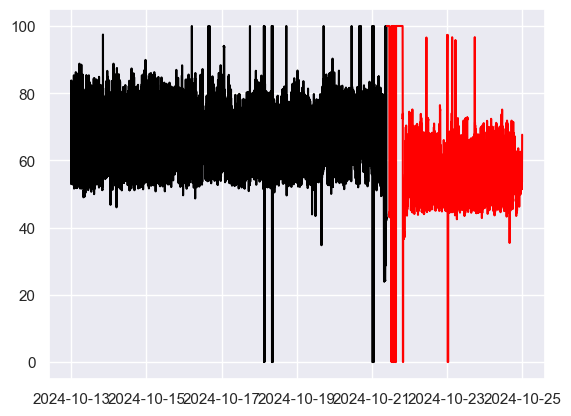

In [ ]:
import math
from statsmodels.tsa.statespace.sarimax import SARIMAX

minimal = raw_merged[["time", "Real Tons", "Bin Level", "Bond Work Index", "feeder 1st Motor"]]
minimal.set_index("time", inplace=True)
train_ratio = math.floor(minimal.shape[0] * 0.7)
train = minimal[minimal.index < minimal.index[train_ratio]]
test = minimal[minimal.index >= minimal.index[train_ratio]]
plt.plot(train["Bin Level"], color = "black")
plt.plot(test["Bin Level"], color = "red")

In [131]:
ARMAmodel = SARIMAX(train["Bin Level"], order=(1, 0, 1))
ARMAmodel = ARMAmodel.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)


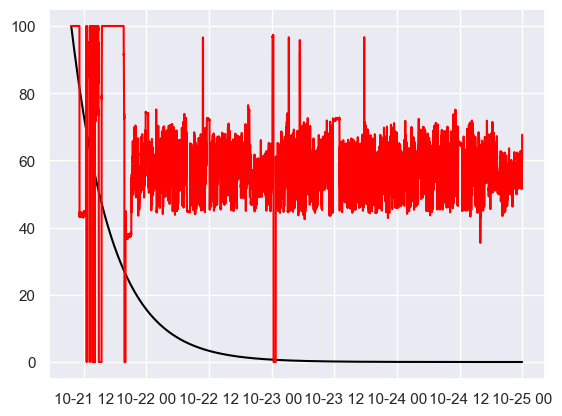

In [142]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
plt.plot(y_pred_df["Predictions"], color='black')
plt.plot(test["Bin Level"], color = "red")

In [135]:
import numpy as np
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(test["Bin Level"].values, y_pred_df["Predictions"]))

np.float64(54.91764451053368)

In [137]:
from statsmodels.tsa.arima.model import ARIMA

ARIMAmodel = ARIMA(train["Bin Level"], order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency s will be used.
  self._init_dates(dates, freq)


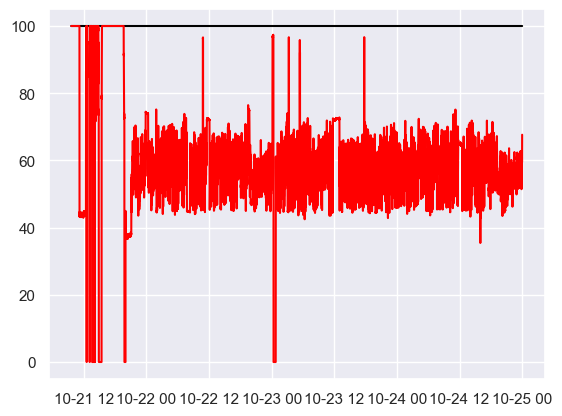

In [143]:
y_pred_arima = ARIMAmodel.get_forecast(len(test.index))
y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05) 
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
plt.plot(y_pred_df_arima["Predictions"], color='black')
plt.plot(test["Bin Level"], color = "red")

In [141]:
np.sqrt(mean_squared_error(test["Bin Level"].values, y_pred_df_arima["Predictions"]))

np.float64(43.118066371159756)